In [1]:
!pip install transformers datasets sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 10.9 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

In [3]:
data=load_dataset('kde4',lang1='en',lang2='fr')
data

Generating train split:   0%|          | 0/210173 [00:00<?, ? examples/s]

Dataset kde4 downloaded and prepared to /root/.cache/huggingface/datasets/kde4/en-fr-lang1=en,lang2=fr/0.0.0/243129fb2398d5b0b4f7f6831ab27ad84774b7ce374cf10f60f6e1ff331648ac. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 210173
    })
})

In [4]:
small=data['train'].shuffle(seed=42).select(range(1_000))

In [5]:
split=small.train_test_split(seed=42)

In [6]:
split['train'][0]

{'id': '169005',
 'translation': {'en': '& Reduce Tree', 'fr': "& Refermer l' arborescence"}}

In [7]:
from transformers import AutoTokenizer
checkpoint='Helsinki-NLP/opus-mt-en-fr'
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [8]:
en=split['train'][5]['translation']['en']
fr=split['train'][5]['translation']['fr']
en,fr

('You can either pick a file or enter its name in the Location: box.',
 'Vous pouvez soit choisir un fichier soit saisir son nom dans la zone de texte Emplacement.')

In [9]:
inputs=tokenizer(en)
inputs

{'input_ids': [213, 115, 1828, 8437, 15, 1437, 57, 3307, 96, 1129, 18, 4, 4577, 37, 5311, 3, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [10]:
with tokenizer.as_target_tokenizer():
  target=tokenizer(fr)
target

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3619: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


{'input_ids': [344, 1069, 345, 4094, 34, 2428, 345, 9315, 113, 689, 31, 8, 1283, 5, 1470, 21708, 3, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [11]:
tokenizer.convert_ids_to_tokens(target['input_ids'])

['▁Vous',
 '▁pouvez',
 '▁soit',
 '▁choisir',
 '▁un',
 '▁fichier',
 '▁soit',
 '▁saisir',
 '▁son',
 '▁nom',
 '▁dans',
 '▁la',
 '▁zone',
 '▁de',
 '▁texte',
 '▁Emplacement',
 '.',
 '</s>']

In [12]:
#wrong language
bad_targets=tokenizer(fr)
tokenizer.convert_ids_to_tokens(bad_targets['input_ids'])

['▁V',
 'ous',
 '▁po',
 'uv',
 'ez',
 '▁so',
 'it',
 '▁cho',
 'is',
 'ir',
 '▁un',
 '▁fi',
 'chi',
 'er',
 '▁so',
 'it',
 '▁s',
 'ais',
 'ir',
 '▁son',
 '▁no',
 'm',
 '▁dans',
 '▁la',
 '▁zone',
 '▁de',
 '▁text',
 'e',
 '▁Em',
 'placement',
 '.',
 '</s>']

(array([469., 131.,  40.,  28.,  10.,  15.,  15.,   5.,   5.,   4.,   0.,
          6.,   4.,   3.,   2.,   1.,   2.,   1.,   1.,   1.,   1.,   2.,
          0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 2.67200e+01, 5.24400e+01, 7.81600e+01, 1.03880e+02,
        1.29600e+02, 1.55320e+02, 1.81040e+02, 2.06760e+02, 2.32480e+02,
        2.58200e+02, 2.83920e+02, 3.09640e+02, 3.35360e+02, 3.61080e+02,
        3.86800e+02, 4.12520e+02, 4.38240e+02, 4.63960e+02, 4.89680e+02,
        5.15400e+02, 5.41120e+02, 5.66840e+02, 5.92560e+02, 6.18280e+02,
        6.44000e+02, 6.69720e+02, 6.95440e+02, 7.21160e+02, 7.46880e+02,
        7.72600e+02, 7.98320e+02, 8.24040e+02, 8.49760e+02, 8.75480e+02,
        9.01200e+02, 9.26920e+02, 9.52640e+02, 9.78360e+02, 1.00408e+03,
        1.02980e+03, 1.05552e+03, 1.08124e+03, 1.10696e+03, 1.13268e+03,
 

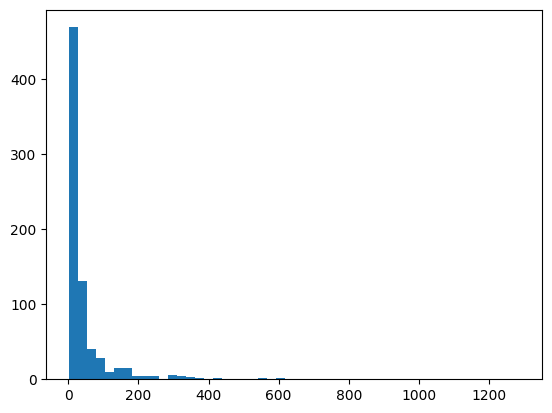

In [13]:
import matplotlib.pyplot as plt
train=split['train']['translation']
input_lens=[len(tr['en']) for tr in train]
plt.hist(input_lens,bins=50)

(array([491., 120.,  51.,  19.,  14.,  13.,   8.,   4.,   2.,   7.,   3.,
          4.,   4.,   3.,   0.,   2.,   1.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 4.20600e+01, 8.31200e+01, 1.24180e+02, 1.65240e+02,
        2.06300e+02, 2.47360e+02, 2.88420e+02, 3.29480e+02, 3.70540e+02,
        4.11600e+02, 4.52660e+02, 4.93720e+02, 5.34780e+02, 5.75840e+02,
        6.16900e+02, 6.57960e+02, 6.99020e+02, 7.40080e+02, 7.81140e+02,
        8.22200e+02, 8.63260e+02, 9.04320e+02, 9.45380e+02, 9.86440e+02,
        1.02750e+03, 1.06856e+03, 1.10962e+03, 1.15068e+03, 1.19174e+03,
        1.23280e+03, 1.27386e+03, 1.31492e+03, 1.35598e+03, 1.39704e+03,
        1.43810e+03, 1.47916e+03, 1.52022e+03, 1.56128e+03, 1.60234e+03,
        1.64340e+03, 1.68446e+03, 1.72552e+03, 1.76658e+03, 1.80764e+03,
 

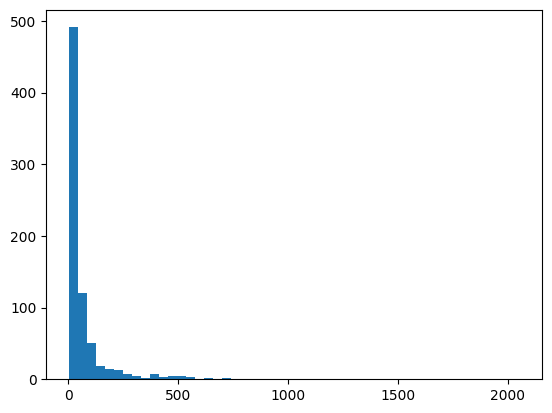

In [14]:
target_lens=[len(tr['fr']) for tr in train]
plt.hist(target_lens,bins=50)

In [15]:
max_input_len=128
max_target_len=128

In [16]:
#tokenize both inputs and target
def tokenizer_fn(batch):
  inputs=[x['en'] for x in batch['translation']]
  targets=[x['fr'] for x in batch['translation']]
  tokenized_inputs=tokenizer(inputs,max_length=max_input_len,truncation=True)

  with tokenizer.as_target_tokenizer():
    tokenized_targets=tokenizer(targets,max_length=max_target_len,truncation=True)

  tokenized_inputs['labels']=tokenized_targets['input_ids']
  return tokenized_inputs

In [17]:
tokenized_datasets=split.map(
    tokenizer_fn,
    batched=True,
    remove_columns=split['train'].column_names
)

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

In [18]:
from transformers import AutoModelForSeq2SeqLM
model=AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

In [19]:
from transformers import DataCollatorForSeq2Seq
data_collator=DataCollatorForSeq2Seq(tokenizer,model=model)

In [20]:
[tokenized_datasets['train'][i] for i in range(1,3)]

[{'input_ids': [526, 3261, 0],
  'attention_mask': [1, 1, 1],
  'labels': [526, 3261, 0]},
 {'input_ids': [3492,
   3070,
   6443,
   37,
   443,
   61,
   32,
   317,
   2203,
   4824,
   514,
   1807,
   971,
   4,
   4124,
   3,
   0],
  'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'labels': [34023,
   5,
   3948,
   5,
   372,
   402,
   38492,
   350,
   823,
   95,
   13439,
   2,
   25985,
   14,
   6,
   3996,
   3,
   0]}]

In [21]:
batch=data_collator([tokenized_datasets['train'][i] for i in range(1,3)])
batch.keys()

dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

In [22]:
batch['labels']

tensor([[  526,  3261,     0,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100],
        [34023,     5,  3948,     5,   372,   402, 38492,   350,   823,    95,
         13439,     2, 25985,    14,     6,  3996,     3,     0]])

In [23]:
batch['decoder_input_ids']

tensor([[59513,   526,  3261,     0, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513],
        [59513, 34023,     5,  3948,     5,   372,   402, 38492,   350,   823,
            95, 13439,     2, 25985,    14,     6,  3996,     3]])

In [24]:
tokenizer.convert_ids_to_tokens(batch['decoder_input_ids'][0])

['<pad>',
 '▁K',
 'DE',
 '</s>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>']

In [25]:
split['train'][1]

{'id': '47571', 'translation': {'en': 'KDE', 'fr': 'KDE'}}

In [26]:
!pip install sacrebleu bert-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.7 MB/s eta 0:00:00


In [27]:
from datasets import load_metric
bleu_metric=load_metric('sacrebleu')
bert_metric=load_metric('bertscore')

<ipython-input-27-4f3c98bcbc9c>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleu_metric=load_metric('sacrebleu')


In [28]:
bleu_metric.compute(predictions=['I love cats'],references=[['I love cats']])

{'score': 0.0,
 'counts': [3, 2, 1, 0],
 'totals': [3, 2, 1, 0],
 'precisions': [100.0, 100.0, 100.0, 0.0],
 'bp': 1.0,
 'sys_len': 3,
 'ref_len': 3}

In [29]:
s='Martian is an efficient NMT framework written in C++'
bleu_metric.compute(predictions=[s],references=[[s]])

{'score': 100.00000000000004,
 'counts': [11, 10, 9, 8],
 'totals': [11, 10, 9, 8],
 'precisions': [100.0, 100.0, 100.0, 100.0],
 'bp': 1.0,
 'sys_len': 11,
 'ref_len': 11}

In [30]:
bert_metric.compute(
    predictions=['I love cats'],
    references=[['I like cats']],lang='en'
)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'precision': [0.9803367853164673],
 'recall': [0.9803367853164673],
 'f1': [0.9803367853164673],
 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.30.2)'}

In [31]:
import numpy as np
def compute_metrics(preds_and_labels):
  preds,labels=preds_and_labels

  decoded_preds=tokenizer.batch_decode(preds,skip_special_tokens=True)

  labels=np.where(labels!=-100,labels,tokenizer.pad_token_id)
  decoded_labels=tokenizer.batch_decode(labels,skip_special_tokens=True)

  decoded_preds=[pred.strip() for pred in decoded_preds]
  decoded_labels=[[label.strip()] for label in decoded_labels]
  bleu=bleu_metric.compute(
      predictions=decoded_preds,references=decoded_labels
  )
  bert_score=bert_metric.compute(
       predictions=decoded_preds,references=decoded_labels,lang='fr'
  )
  return{
      'bleu':bleu['score'],
      'bert_score':np.mean(bert_score['f1'])
  }


In [33]:
!pip install transformers[torch]
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 5.4 MB/s eta 0:00:00


In [34]:
from transformers import Seq2SeqTrainingArguments
training_args=Seq2SeqTrainingArguments(
    'finetuned-model',
    evaluation_strategy='no',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=2,
    predict_with_generate=True,
    fp16=True


)

ImportError: ignored

In [35]:
trainer.train()

' '

In [36]:
trainer.evaluate(max_length=max_target_len)

' '

In [37]:
trainer.save_model('my_saved_model')

' '

In [38]:
from transformers import pipeline
translator=pipeline('tranlation',model='my_saved_model',device=0)

' '

In [40]:
translator('I hope you are a good boy')

'   '

In [41]:
' '

' '

In [42]:
' '

' '

In [43]:
' '

' '